In [ ]:
# Run in mymusex enìviroment (for Bokeh)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import bokeh.palettes as palette
import scipy as sp
from scipy import stats
import random
import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#### Permutation test

In [2]:
def permutation_test(corr_x, corr_y, rep):
    
    corr_list = []

    for i in range(rep):

        if i > 0:
            random.shuffle(corr_y)

        a = sp.stats.spearmanr(corr_x, corr_y, nan_policy='omit')
        corr_list.append(a[0])
        
    new_corr = []
    
    if corr_list[0] > 0:
        for i in range(1,len(corr_list)):
            if corr_list[i] >= corr_list[0]:
                new_corr.append(corr_list[i])
                
    if corr_list[0] < 0:
        for i in range(1,len(corr_list)):
            if corr_list[i] <= corr_list[0]:
                new_corr.append(corr_list[i])           
            
    return len(new_corr)/rep

### Names

In [3]:
# Nomi dei file (45)
network_names = ['CElegans-c_elegans_herm_pharynx_1_graphml.edges',
'CElegans-c_elegans_neural_male_1_graphml.edges',
'CionaIntestinalis-elife-16962-fig16-data1-v1_xlsx.edges',
'CionaIntestinalis-elife-16962-fig16-data2-v1_xlsx.edges',
'Drosophila-N1781-drosophila_medulla_1_graphml.edges',
'Drosophila-N388-connectivity_matrix_table_1_2_csv.edges',
'Drosophila-N49-adj_drosophila_txt.edges',
'Human_1215-sub-0027055_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027055_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027056_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027056_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027057_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027057_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027058_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027058_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027059_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027059_ses-1_dwi_Talairach_edges_txt.edges',
'Human_188-NKI_Rockland_8735778_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9006154_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9100911_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9421819_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9536886_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9537916_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9630905_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9645370_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9716792_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9780496_DTI_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjA_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjB_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjC_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjD_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjE_connectmat_txt.edges',
'Mouse-kasthuri_graph_v4_graphml.edges',
'Mouse-mouse_brain_1_graphml.edges',
'Mouse-mouse_retina_1_graphml.edges',
'Mouse-mouse_visual_cortex_1_graphml.edges',
'Mouse-mouse_visual_cortex_2_graphml.edges',
'PlatynereisDumerilli-Platynereis_dumerilii_larva_csv.edges',
'Rat-rattus_norvegicus_brain_1_graphml.edges',
'Rat-rattus_norvegicus_brain_2_graphml.edges',
'Rat-rattus_norvegicus_brain_3_graphml.edges',
'Rhesus-rhesus_brain_1_graphml.edges',
'Rhesus-rhesus_brain_2_graphml.edges',
'Rhesus-rhesus_cerebral_cortex_1_graphml.edges',
'Rhesus-rhesus_interareal_cortical_network_2_graphml.edges'
]

# Nomi da mostrare in plot dei connettomi uguali per la stessa specie con lo stesso numero di nodi in modo da fare la media
network_names_pro_mean = ['C. elegans herm.',
'C. elegans male',
'C. intestinalis 1',
'C. intestinalis 2',
'Drosophila medulla',
'Drosophila con. mat.',
'Drosophila adj.',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Hagmann',
'Human Hagmann',
'Human Hagmann',
'Human Hagmann',
'Human Hagmann',
'Mouse kasthuri',
'Mouse brain',
'Mouse retina',
'Mouse visual cortex 1',
'Mouse visual cortex 2',
'Platynereis dumerilli',
'Rattus norvegicus',
'Rattus norvegicus',
'Rattus norvegicus',
'Rhesus brain 1',
'Rhesus brain 2',
'Rhesus cerebral cortex',
'Rhesus interareal cort. net.']

# Nomi dei connettomi da mostrare in plot
network_names_pro = ['C. elegans herm.',
'C. elegans male',
'C. intestinalis 1',
'C. intestinalis 2',
'Drosophila medulla',
'Drosophila con. mat.',
'Drosophila adj.',
'Human DS01216 1',
'Human Talairach 1',
'Human DS01216 2',
'Human Talairach 2',
'Human DS01216 3',
'Human Talairach 3',
'Human DS01216 4',
'Human Talairach 4',
'Human DS01216 5',
'Human Talairach 5',
'Human Rockland 1',
'Human Rockland 2',
'Human Rockland 3',
'Human Rockland 4',
'Human Rockland 5',
'Human Rockland 6',
'Human Rockland 7',
'Human Rockland 8',
'Human Rockland 9',
'Human Rockland 10',
'Human Hagmann 1',
'Human Hagmann 2',
'Human Hagmann 3',
'Human Hagmann 4',
'Human Hagmann 5',
'Mouse kasthuri',
'Mouse brain',
'Mouse retina',
'Mouse visual cortex 1',
'Mouse visual cortex 2',
'Platynereis dumerilli',
'Rattus norvegicus 1',
'Rattus norvegicus 2',
'Rattus norvegicus 3',
'Rhesus brain 1',
'Rhesus brain 2',
'Rhesus cerebral cortex',
'Rhesus interareal cort. net.']

In [4]:
def rename_network(df, network_names, network_names_pro):

    net_column = list(df['Network'])

    for i in range(len(net_column)):
        for j in range(len(network_names)):
            
            if network_names[j] in net_column[i]:
                net_column[i] = network_names_pro[j]

    df['Network'] = net_column  

    return df

In [ ]:
def mean_std_realizations(file_name, connectomes_info, network_names, network_names_pro, label):
    
    df = pd.read_csv(file_name, header=None)
    df.columns = ['Network', 'SNR', 'Realization', 'tau', 'MSE','MSE.norm']
    
    df = rename_network(df, network_names, network_names_pro)
    df = df.merge(connectomes_info, how='left', left_on='Network', right_on=label)
    
    df_count = df.groupby(['Network','SNR', 'tau']).count().reset_index()
    
    df_mean = df.groupby(['Network','SNR', 'tau']).mean().reset_index()
    df_mean = df_mean.drop(columns=['Realization','MSE'])
    df_mean = df_mean.rename(columns = {'MSE.norm':'MSE.norm.mean'})
    df_mean['Count'] = df_count['MSE']

    df_std = df.groupby(['Network','SNR','tau']).std().reset_index()
    df_std = df_std.rename(columns = {'MSE.norm':'MSE.norm.std'})

    df_mean['MSE.norm.std'] = df_std['MSE.norm.std']
                
    return df_mean

In [10]:



signals_sub1 = ['White',
            'fBrownTurb_H075_D1',
            'IkedaX',
            'MackeyGlass_t17']


signal_names_sub1 = ['White',
                 'Fractional Brownian',
                'Ikeda',
                'Mackey Glass',]

connectomes_info = pd.read_csv('connectomes_info.csv')

In [ ]:
signals=signals_sub1
signal_names = signal_names_sub1
ver = '1'
key = 'Modularity'#'k.mean','N' #---set
val = 'MSE.norm.mean'

if key=='N':
    network_names_pro_used = network_names_pro_mean
    label = 'label_mean'
elif key=='k.mean':
    network_names_pro_used = network_names_pro
    label = 'label'
elif key=='Modularity':
    network_names_pro_used = network_names_pro
    label = 'label'
else:
    print('Errore!')


parameters = {'axes.labelsize': 20,
          'axes.titlesize': 20,
            'xtick.labelsize': 20, 'ytick.labelsize': 20,
             'legend.fontsize': 10}
plt.rcParams.update(parameters)


rows, cols = int(len(signals)/2), 2
fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(15,10), constrained_layout=True)

for n in range(len(signals)):
    
    #-------      
    #df = mean_std_realizations('../results_Emp_processed/' + signals[n] + '.txt', connectomes_info, network_names, network_names_pro_mean, label)
    # oppure
    
    file_name='../results_Emp_processed/' + signals[n] + '.txt'
    df_ = pd.read_csv(file_name, header=None)
    df_.columns = ['Network', 'SNR', 'Realization', 'tau', 'MSE','MSE.norm']
    
    df_ = rename_network(df_, network_names, network_names_pro_used) #---!
    df_ = df_.merge(connectomes_info, how='left', left_on='Network', right_on=label)
    
    df_count = df_.groupby(['Network','SNR', 'tau']).count().reset_index()
    
    df_mean = df_.groupby(['Network','SNR', 'tau']).mean().reset_index()
    df_mean = df_mean.drop(columns=['Realization','MSE'])
    df_mean = df_mean.rename(columns = {'MSE.norm':'MSE.norm.mean'})
    df_mean['Count'] = df_count['MSE']

    df_std = df_.groupby(['Network','SNR','tau']).std().reset_index()
    df_std = df_std.rename(columns = {'MSE.norm':'MSE.norm.std'})

    df_mean['MSE.norm.std'] = df_std['MSE.norm.std']
    df = df_mean
    
    #-------  
        
    df_c =   df[df['tau'] == 4096]
    df_snr = df_c[df_c['SNR'] == 100].sort_values(by=['N tot spec'])
        
    network = list(df_snr['Network'])
    col = palette.inferno(len(network))[::-1]
        
    corr_data_x = []
    corr_data_y = []
    
    for s in range(len(network)):
        df_sig = df_snr[df_snr['Network'] == network[s]]
        ax[int(np.floor(n/2)),n%2].plot(df_sig[key], df_sig[val], 
                        'o', color = col[s], alpha = 0.7, markersize=8,
                        label = network[s] if n==0 else None)
            
        corr_data_x.append(float(df_sig[key]))
        corr_data_y.append(float(df_sig[val]))
        
    a = sp.stats.spearmanr(corr_data_x, corr_data_y, nan_policy='omit')
    alpha = 1.0 / (1.0 + 1.0 / ( -1.0 * np.e * a[1] * np.log(a[1])))
    per = permutation_test(corr_data_x, corr_data_y, 10000)
        
    print(signals[n])
    if per > 0.001:
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n] + '\n' +
                                            'Corr. = '  + str(round(a[0], 4)) + '   ' + 'P-value = ' + str(round(per, 4)),fontsize=20) 
    else:
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n] + '\n' +
                                            'Corr. = '  + str(round(a[0], 4)) + '   ' + r'P-value $\leq 0.001$',fontsize=20) 
        

    print(signal_names[n], str(round(a[0], 4)), str(round(per, 4)))
                                        
    ax[int(np.floor(n/2)),n%2].set_xscale('log')
    ax[int(np.floor(n/2)),n%2].set_yscale('log')
    ax[int(np.floor(n/2)),n%2].tick_params(axis='both', labelsize=20)
    ax[int(np.floor(n/2)),n%2].grid(True, which="both", ls="--", alpha=0.5)
        
    #break # signals
    
#fig.legend(bbox_to_anchor=(0.015,0), loc='upper left',fontsize=20,ncol=3)
fig.legend(bbox_to_anchor=(1,2), loc='upper left',fontsize=20)

#if key == 'N': fig.supxlabel('Num. of nodes',fontsize=20)
#if key == 'k.mean': fig.supxlabel(r'$\langle k \rangle$',fontsize=20)
#if key == 'Modularity': fig.supxlabel('Modularity',fontsize=20)
#fig.supylabel('Normalized MSE',fontsize=20)
    
filename = './plots/' + ver + '_corr_' + key + '_' + val + '.pdf'
save_fig=False
if save_fig==True:
    plt.savefig(filename) #, bbox_inches='tight'

### Plot MSE vs rank

In [ ]:
signals=signals_sub1
signal_names = signal_names_sub1
ver = '1'
key = 'Rank1' #'Rank1', 'Rank3'
val = 'N' #'MSE.norm.mean' 'N'
label = 'label_mean'
syn_network = 'Emp' #'Emp' 'SBM'

rows, cols = int(len(signals)/2), 2
fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(15,10), constrained_layout=True)

for n in range(len(signals)):
    
    file_name='../results_'+ syn_network + '_processed/' + signals[n] + '.txt'
    df_ = pd.read_csv(file_name, header=None)
    df_.columns = ['Network', 'SNR', 'Realization', 'tau', 'MSE','MSE.norm']
    
    df_ = rename_network(df_, network_names, network_names_pro_mean) #---!
    df_ = df_.merge(connectomes_info, how='left', left_on='Network', right_on=label)
    
    file_name_rank ='../results_'+ syn_network + '_processed_Rank/' + signals[n] + '.txt'
    df_rank = pd.read_csv(file_name_rank, header=None)
    df_rank.columns = ['Network', 'SNR', 'Realization', 'N', 'Rank1', 'Rank2', 'Rank3']
    df_rank = rename_network(df_rank, network_names, network_names_pro_mean) #---!
    
    # merge again
    df_ = df_.merge(df_rank.drop(['SNR', 'Realization','N'], 1), how='left', left_on='Network', right_on='Network')
    
    df_count = df_.groupby(['Network','SNR', 'tau']).count().reset_index()
    
    df_mean = df_.groupby(['Network','SNR', 'tau']).mean().reset_index()
    df_mean = df_mean.drop(columns=['Realization','MSE'])
    df_mean = df_mean.rename(columns = {'MSE.norm':'MSE.norm.mean'})
    df_mean['Count'] = df_count['MSE']

    df_std = df_.groupby(['Network','SNR','tau']).std().reset_index()
    df_std = df_std.rename(columns = {'MSE.norm':'MSE.norm.std'})

    df_mean['MSE.norm.std'] = df_std['MSE.norm.std']
    df = df_mean
    
    #-------  
        
    df_c =   df[df['tau'] == 4096]
    df_snr = df_c[df_c['SNR'] == 100].sort_values(by=['N tot spec'])
        
    network = list(df_snr['Network'])
    col = palette.inferno(len(network))[::-1]
        
    corr_data_x = []
    corr_data_y = []
    
    for s in range(len(network)):
        df_sig = df_snr[df_snr['Network'] == network[s]]
        ax[int(np.floor(n/2)),n%2].plot(df_sig[key], df_sig[val], 
                        'o', color = col[s], alpha = 0.7, markersize=8,
                        label = network[s] if n==0 else None)
            
        corr_data_x.append(float(df_sig[key]))
        corr_data_y.append(float(df_sig[val]))
        
    #----
    max_x = np.max(corr_data_x)
    max_y = np.max(corr_data_y)
    min_x = np.min(corr_data_x)
    min_y = np.min(corr_data_y)
    max_max = np.max([max_x , max_y])
    min_min = np.min([min_x , min_y])
    
    ax[int(np.floor(n/2)),n%2].axline((min_min, min_min),  (max_max,max_max ), color="black", linestyle=":")
        
    a = sp.stats.spearmanr(corr_data_x, corr_data_y, nan_policy='omit')
    alpha = 1.0 / (1.0 + 1.0 / ( -1.0 * np.e * a[1] * np.log(a[1])))
    per = permutation_test(corr_data_x, corr_data_y, 10000)
        
    print(signals[n])
    if per > 0.001:
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n] + '\n' +
                                            'Corr. = '  + str(round(a[0], 4)) + '   ' + 'P-value = ' + str(round(per, 4)),fontsize=20) 
    else:
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n] + '\n' +
                                            'Corr. = '  + str(round(a[0], 4)) + '   ' + r'P-value $\leq 0.001$',fontsize=20) 
        


    print(signal_names[n], str(round(a[0], 4)), str(round(per, 4)))
                                        
    ax[int(np.floor(n/2)),n%2].set_xscale('log')
    ax[int(np.floor(n/2)),n%2].set_yscale('log')
    ax[int(np.floor(n/2)),n%2].tick_params(axis='both', labelsize=18)
    ax[int(np.floor(n/2)),n%2].grid(True, which="both", ls="--", alpha=0.5)
    
    ax[int(np.floor(n/2)),n%2].set_aspect("equal")
    
    #break # signals
    
#fig.legend(bbox_to_anchor=(0.015,0), loc='upper left',fontsize=20,ncol=3)
fig.legend(bbox_to_anchor=(1,2), loc='upper left',fontsize=20)

do_save = False
if do_save:
    filename = './plots/' + ver + syn_network + '_corr_' + key + '_' + val + '_v2.pdf'
    plt.savefig(filename) #, bbox_inches='tight'

/Users/valeria/anaconda3/envs/mymusex/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


White
White 0.1247 0.2859
fBrownTurb_H075_D1
Fractional Brownian 0.1762 0.2196
IkedaX
Ikeda 0.1585 0.2401
MackeyGlass_t17
Mackey Glass 0.2443 0.1294


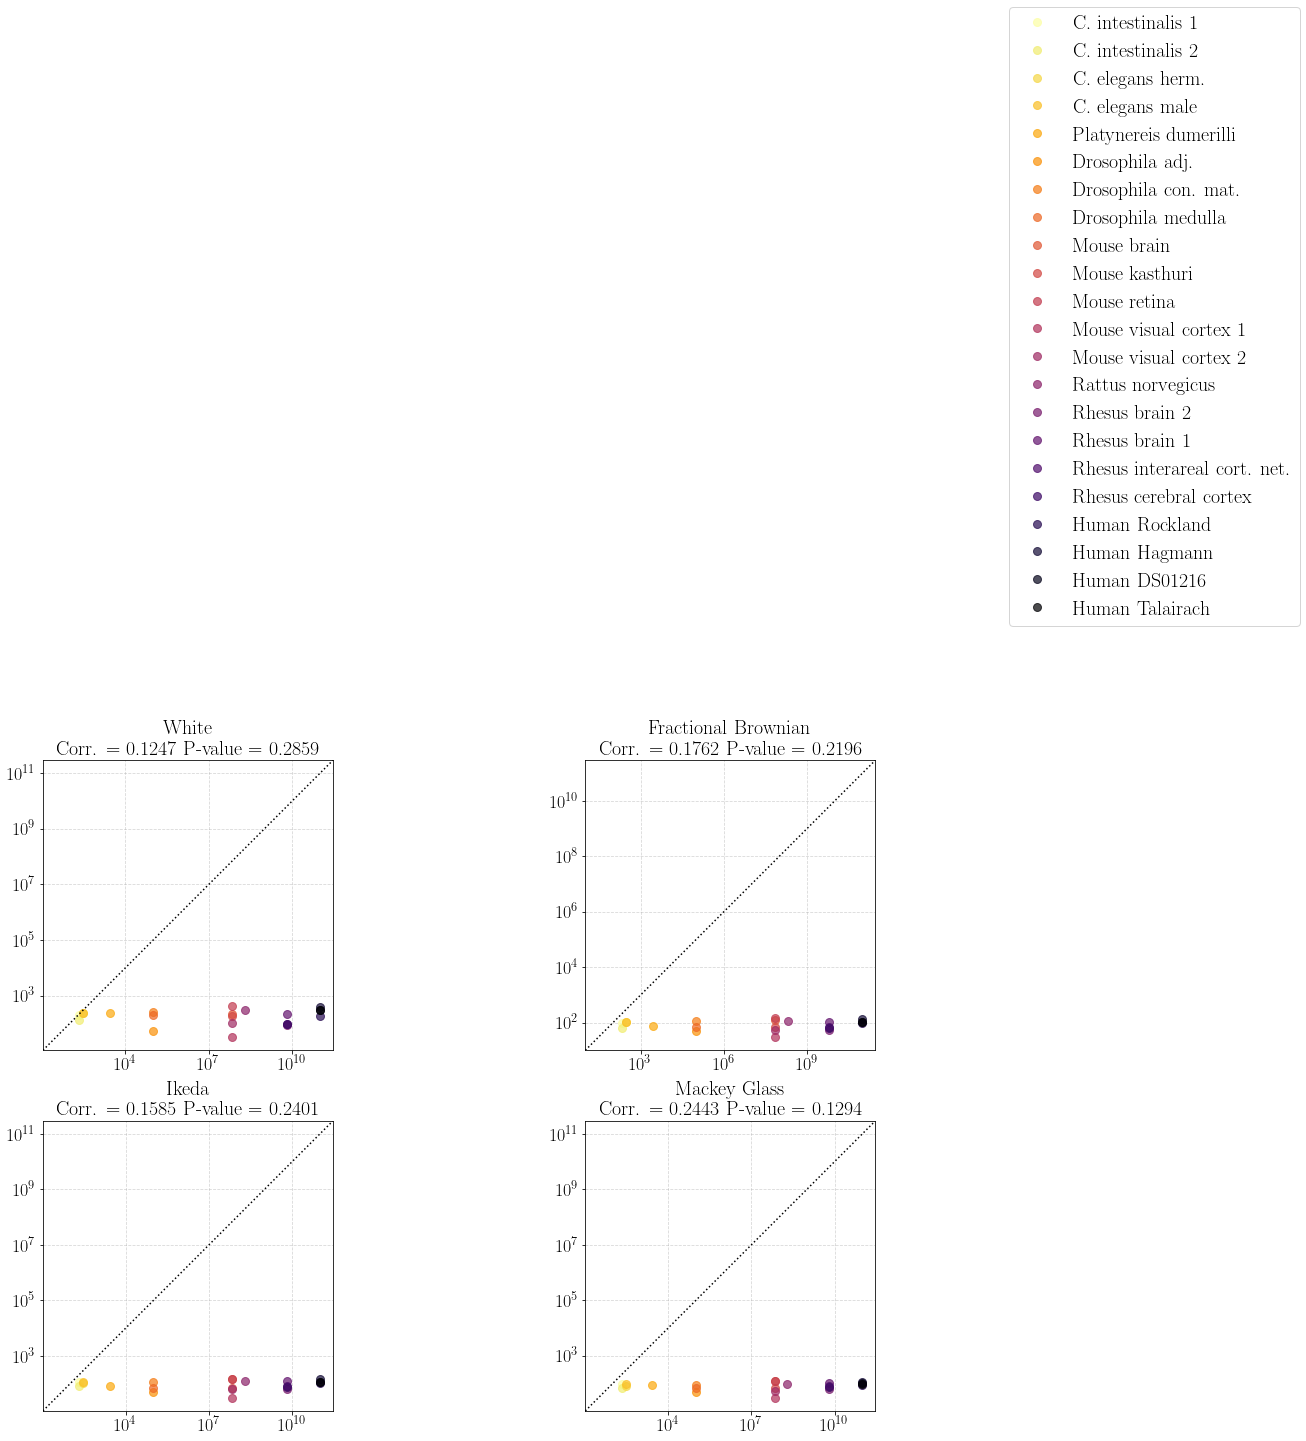

In [24]:
signals=signals_sub1
signal_names = signal_names_sub1
ver = '1'
key = 'N tot spec' #'Rank1', 'Rank3'
val = 'Rank1' #'MSE.norm.mean' 'N'
label = 'label_mean' #nota che: len(np.unique(connectomes_info.label_mean))
syn_network = 'SBM' #'Emp' 'SBM'

rows, cols = int(len(signals)/2), 2
fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(15,10), constrained_layout=True)

for n in range(len(signals)):
       
    file_name='../results_'+ syn_network + '_processed/' + signals[n] + '.txt'
    df_ = pd.read_csv(file_name, header=None)
    df_.columns = ['Network', 'SNR', 'Realization', 'tau', 'MSE','MSE.norm']
    
    
    df_ = rename_network(df_, network_names, network_names_pro_mean) #---! 
    df_ = df_.merge(connectomes_info, how='left', left_on='Network', right_on=label)
    
    file_name_rank ='../results_'+ syn_network + '_processed_Rank/' + signals[n] + '.txt'
    df_rank = pd.read_csv(file_name_rank, header=None)
    df_rank.columns = ['Network', 'SNR', 'Realization', 'N', 'Rank1', 'Rank2', 'Rank3']
    df_rank = rename_network(df_rank, network_names, network_names_pro_mean) #---!
    
    # merge again
    df_ = df_.merge(df_rank.drop(['SNR', 'Realization','N'], 1), how='left', left_on='Network', right_on='Network')
    
    df_count = df_.groupby(['Network','SNR', 'tau']).count().reset_index()
    
    df_mean = df_.groupby(['Network','SNR', 'tau']).mean().reset_index()
    df_mean = df_mean.drop(columns=['Realization','MSE'])
    df_mean = df_mean.rename(columns = {'MSE.norm':'MSE.norm.mean'})
    df_mean['Count'] = df_count['MSE']

    df_std = df_.groupby(['Network','SNR','tau']).std().reset_index()
    df_std = df_std.rename(columns = {'MSE.norm':'MSE.norm.std'})

    df_mean['MSE.norm.std'] = df_std['MSE.norm.std']
    df = df_mean

    #-------  
        
    df_c =   df[df['tau'] == 4096]
    df_snr = df_c[df_c['SNR'] == 100].sort_values(by=['N tot spec'])
    
        
    network = list(df_snr['Network'])
    col = palette.inferno(len(network))[::-1]
        
    corr_data_x = []
    corr_data_y = []
    
    for s in range(len(network)):
        df_sig = df_snr[df_snr['Network'] == network[s]]
        ax[int(np.floor(n/2)),n%2].plot(df_sig[key], df_sig[val], 
                        'o', color = col[s], alpha = 0.7, markersize=8,
                        label = network[s] if n==0 else None)
            
        corr_data_x.append(float(df_sig[key]))
        corr_data_y.append(float(df_sig[val]))
        
    #----
    max_x = np.max(corr_data_x)
    max_y = np.max(corr_data_y)
    min_x = np.min(corr_data_x)
    min_y = np.min(corr_data_y)
    max_max = np.max([max_x , max_y])
    min_min = np.min([min_x , min_y])
    
    ax[int(np.floor(n/2)),n%2].axline((min_min, min_min),  (max_max,max_max ), color="black", linestyle=":")
        
    a = sp.stats.spearmanr(corr_data_x, corr_data_y, nan_policy='omit')
    alpha = 1.0 / (1.0 + 1.0 / ( -1.0 * np.e * a[1] * np.log(a[1])))
    per = permutation_test(corr_data_x, corr_data_y, 10000)
        
    print(signals[n])
    if per > 0.001:
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n] + '\n' +
                                            'Corr. = '  + str(round(a[0], 4)) + '   ' + 'P-value = ' + str(round(per, 4)),fontsize=20) 
    else:
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n] + '\n' +
                                            'Corr. = '  + str(round(a[0], 4)) + '   ' + r'P-value $\leq 0.001$',fontsize=20) 
        


    print(signal_names[n], str(round(a[0], 4)), str(round(per, 4)))
                                        
    ax[int(np.floor(n/2)),n%2].set_xscale('log')
    ax[int(np.floor(n/2)),n%2].set_yscale('log')
    ax[int(np.floor(n/2)),n%2].tick_params(axis='both', labelsize=18)
    ax[int(np.floor(n/2)),n%2].grid(True, which="both", ls="--", alpha=0.5)
    
    ax[int(np.floor(n/2)),n%2].set_aspect("equal")
    
    #break # signals
    
fig.legend(bbox_to_anchor=(1,2), loc='upper left',fontsize=20)

do_save = True
if do_save:
    filename = './plots/' + ver + syn_network + '_corr_' + key + '_' + val + '_v2.pdf'
    plt.savefig(filename) #, bbox_inches='tight'


In [ ]:
df_snr

In [25]:
# Custom colomap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack( (top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))) )

newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [26]:
# New:

def mean_Rank_realizations(file_name_rank, connectomes_info, network_names, network_names_pro, label):

    #file_name_rank='../results_'+ syn_network + '_processed_Rank/' + signals[n] + '.txt'

    df = pd.read_csv(file_name_rank, header=None)
    df.columns = ['Network', 'SNR', 'Realization', 'N', 'Rank1', 'Rank2', 'Rank3']
    
    df = rename_network(df, network_names, network_names_pro)
    df = df.merge(connectomes_info, how='left', left_on='Network', right_on=label)
    
    df_count = df.groupby(['Network','SNR']).count().reset_index()
    df_mean = df.groupby(['Network','SNR']).mean().reset_index()
    df_mean = df_mean.drop(columns=['Realization'])
    df_mean = df_mean.rename(columns = {'Rank1': 'Rank1.mean'})
    df_mean['Count'] = df_count['Rank1']
    df_std = df.groupby(['Network','SNR']).std().reset_index()
    df_std = df_std.rename(columns = {'Rank1':'Rank1.std'})
    df_mean['Rank1.std'] = df_std['Rank1.std']                
    return df_mean


In [27]:
signals=signals_sub1
signal_names = signal_names_sub1
label = 'label_mean'
network_names_pro = network_names_pro_mean
ver = '1'


#------------

rows, cols = int(len(signals)/2), 2
fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(16,10), constrained_layout=True) 
ax_list = []

        
for n in range(len(signals)):
    print(signals[n])
        
    df = mean_Rank_realizations('../results_Emp_processed_Rank/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
    df_ER = mean_Rank_realizations('../results_ER_processed_Rank/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
    df_CM = mean_Rank_realizations('../results_CM_processed_Rank/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
    df_SBM = mean_Rank_realizations('../results_SBM_processed_Rank/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
    print(df.shape)
    print(df_ER.shape)
    print(df_CM.shape)
    print(df_SBM.shape)
    #break
    df = df.rename(columns = {'Rank1.mean': 'Rank.mean', 'Rank1.std': 'Rank.std'})    
    
    df['Rank.mean_ER'] = df_ER['Rank1.mean']
    df['Rank.std_ER']  = df_ER['Rank1.std']
        
    df['Rank.mean_CM'] = df_CM['Rank1.mean']
    df['Rank.std_CM']  = df_CM['Rank1.std']
        
    df['Rank.mean_SBM'] = df_SBM['Rank1.mean']
    df['Rank.std_SBM']  = df_SBM['Rank1.std']
        
    df['ZER'] = ( df['Rank.mean_ER'] - df['Rank.mean'] ) / np.sqrt( np.power(df['Rank.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['Rank.std_ER']/np.sqrt(df['Count']),2) )
    df['ZCM'] = ( df['Rank.mean_CM'] - df['Rank.mean'] ) / np.sqrt( np.power(df['Rank.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['Rank.std_CM']/np.sqrt(df['Count']),2) )
    df['ZSBM'] = ( df['Rank.mean_SBM'] - df['Rank.mean'] ) / np.sqrt( np.power(df['Rank.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['Rank.std_SBM']/np.sqrt(df['Count']),2) )
                       
    df_snr = df[df['SNR'] == 100].sort_values(by=['N tot spec'])
    
    df_snr = df_snr[['Network', 'ZER', 'ZCM', 'ZSBM']]
    
    #df_snr.replace([np.inf, -np.inf], np.nan, inplace=True) #--

    df_snr['ZER'] = np.where(df_snr['ZER'].between(-1.96,1.96), np.nan, df_snr['ZER'])
    df_snr['ZCM'] = np.where(df_snr['ZCM'].between(-1.96,1.96), np.nan, df_snr['ZCM'])
    df_snr['ZSBM'] = np.where(df_snr['ZSBM'].between(-1.96,1.96), np.nan, df_snr['ZSBM'])
     
        
    network = list(df_snr['Network'])
    df_snr = df_snr.set_index('Network', drop=True)
    df_snr.index.names = [None]
        
    im = sns.heatmap(df_snr.T, ax=ax[int(np.floor(n/2)),n%2],
                vmin=-20, vmax=20,
                cmap=newcmp,
                robust=False, annot=None,
                fmt='.2g', annot_kws=None,
                linewidths=0.5, linecolor='white',
                cbar=None, cbar_kws=None,
                cbar_ax=None,
                square=True,
                xticklabels='auto', yticklabels='auto',
                mask=None)  
        
    ax[int(np.floor(n/2)),n%2].set_facecolor('whitesmoke')
    
    ax[int(np.floor(n/2)),n%2].set_title(signal_names[n],fontsize=22)
    
    ax[int(np.floor(n/2)),n%2].set_xticks([i+0.5 for i in range(len(network))])
    ax[int(np.floor(n/2)),n%2].set_xticklabels(network) #, rotation='60', ha = 'right'
    ax[int(np.floor(n/2)),n%2].set_yticks([i+0.5 for i in range(3)])
    ax[int(np.floor(n/2)),n%2].set_yticklabels(['ER','CM','SBM'], rotation='horizontal')
    ax[int(np.floor(n/2)),n%2].tick_params(left = False, bottom=False, labelsize=22)
    ax_list.append(ax[int(np.floor(n/2)),n%2])
    
    #break
    
'''   
ax[int(np.floor(6/2)),6%2].tick_params(bottom=True)
ax[int(np.floor(7/2)),7%2].tick_params(bottom=True)
    
mappable = im.get_children()[0]
cbar = plt.colorbar(mappable, ax=ax_list,orientation='horizontal', location='top', shrink=0.3)
cbar.ax.tick_params(labelsize=22)
    
filename = './plots/' + 'heatmap_Zscore.pdf'
#plt.savefig(filename, bbox_inches='tight')
 
''' 

White
(22, 24)
(22, 24)
(22, 24)
(22, 24)
fBrownTurb_H075_D1
(22, 24)
(22, 24)
(22, 24)
(132, 24)
IkedaX
(22, 24)
(22, 24)
(22, 24)
(22, 24)
MackeyGlass_t17
(22, 24)
(22, 24)
(22, 24)
(22, 24)


"   \nax[int(np.floor(6/2)),6%2].tick_params(bottom=True)\nax[int(np.floor(7/2)),7%2].tick_params(bottom=True)\n    \nmappable = im.get_children()[0]\ncbar = plt.colorbar(mappable, ax=ax_list,orientation='horizontal', location='top', shrink=0.3)\ncbar.ax.tick_params(labelsize=22)\n    \nfilename = './plots/' + 'heatmap_Zscore.pdf'\n#plt.savefig(filename, bbox_inches='tight')\n \n"

White
ZER 0.515 0.0166
ZCM 0.6574 0.0553
ZSBM 0.3928 0.1668
fBrownTurb_H075_D1
ZER 0.4616 0.0229
ZCM 0.7071 0.0795
ZSBM 0.1302 0.2954
IkedaX
ZER 0.888 0.0
ZCM 0.779 0.0131
ZSBM -0.1118 0.4126
MackeyGlass_t17
ZER 0.6353 0.0014
ZCM 0.5714 0.0909
ZSBM 0.7407 0.0502


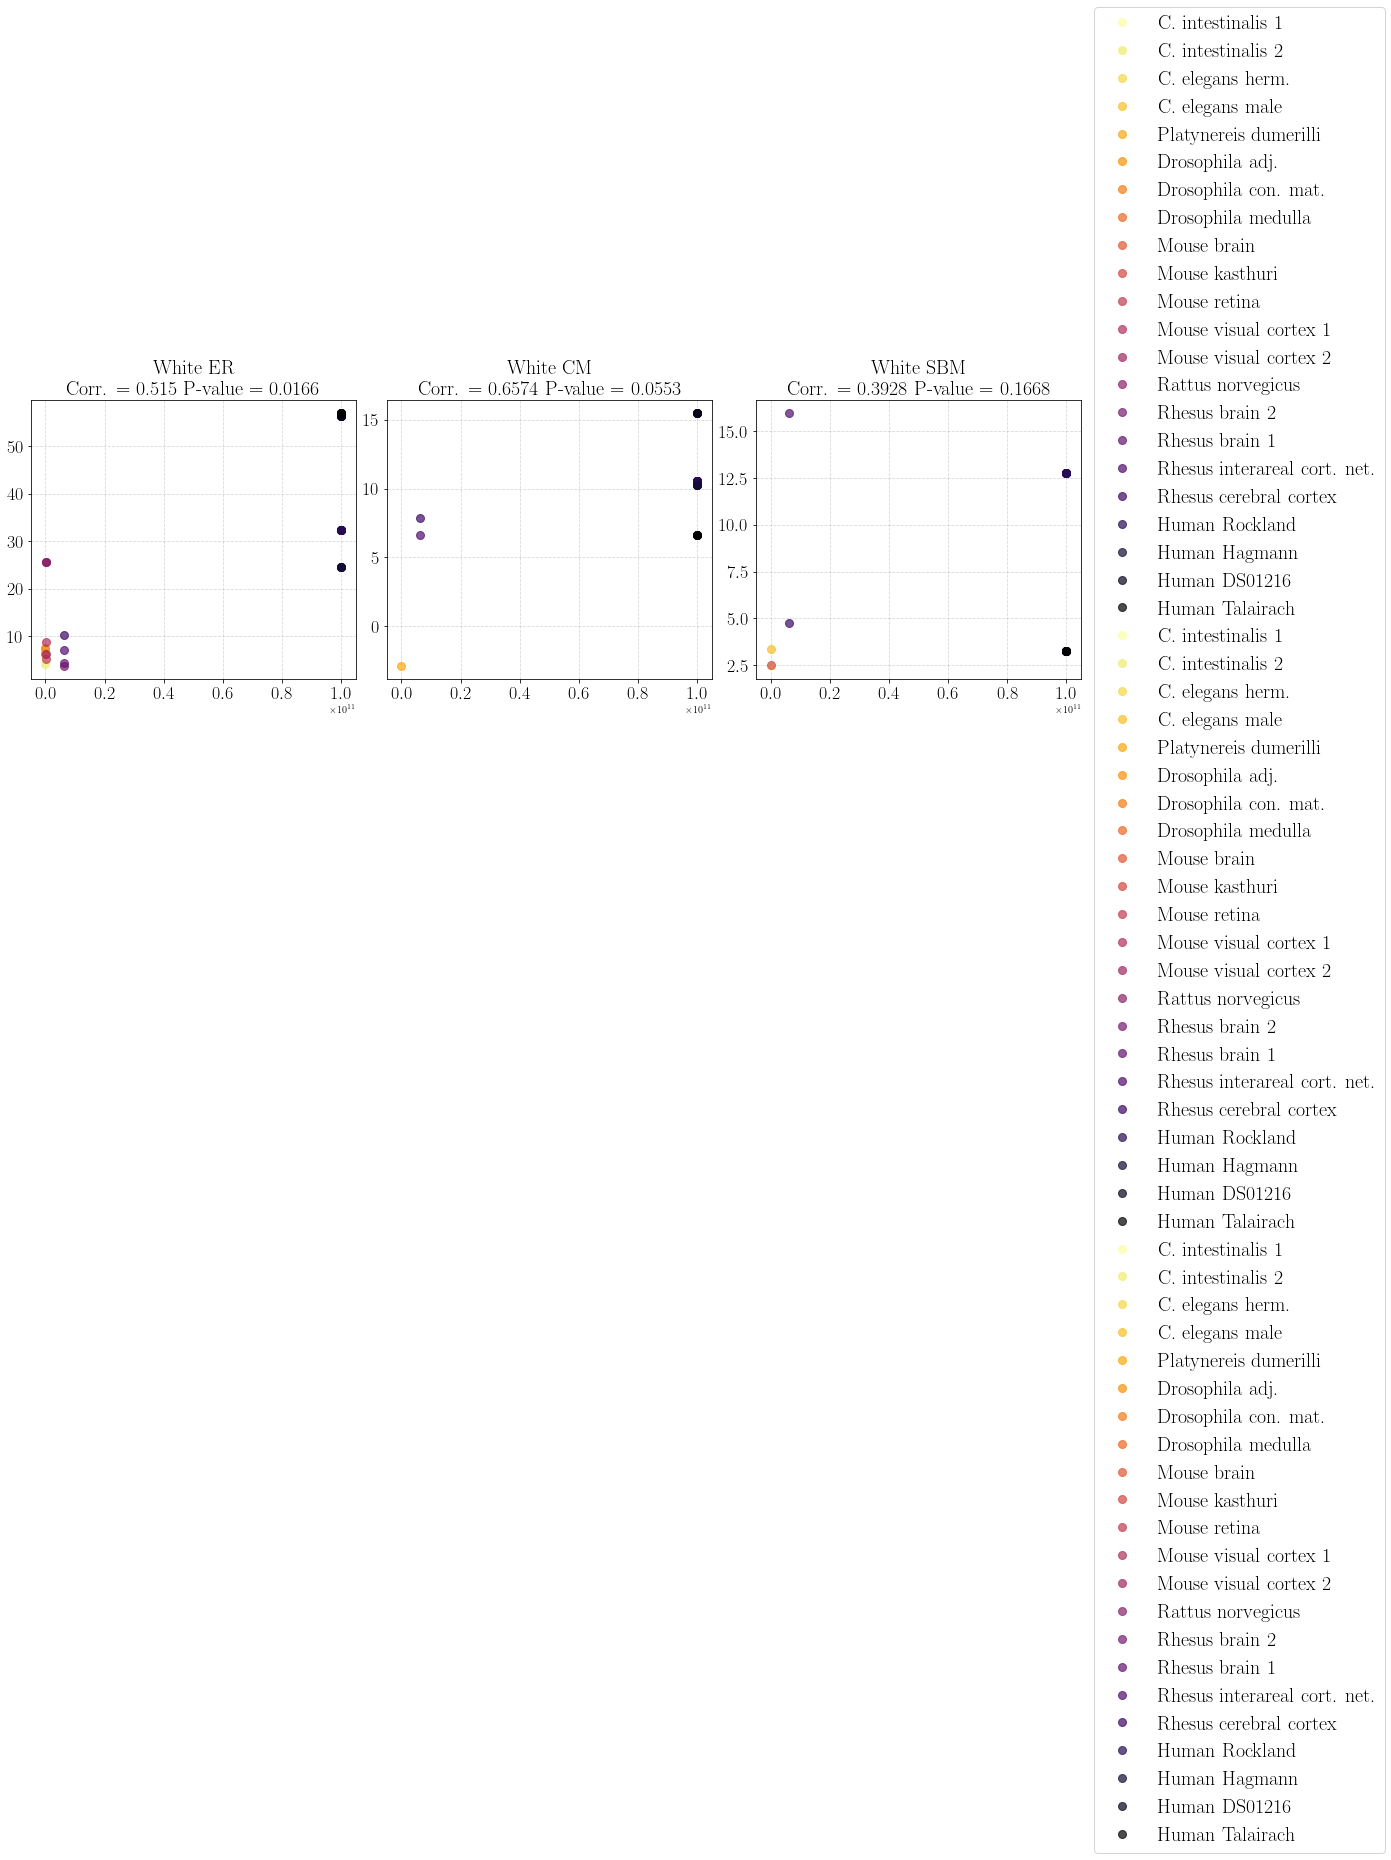

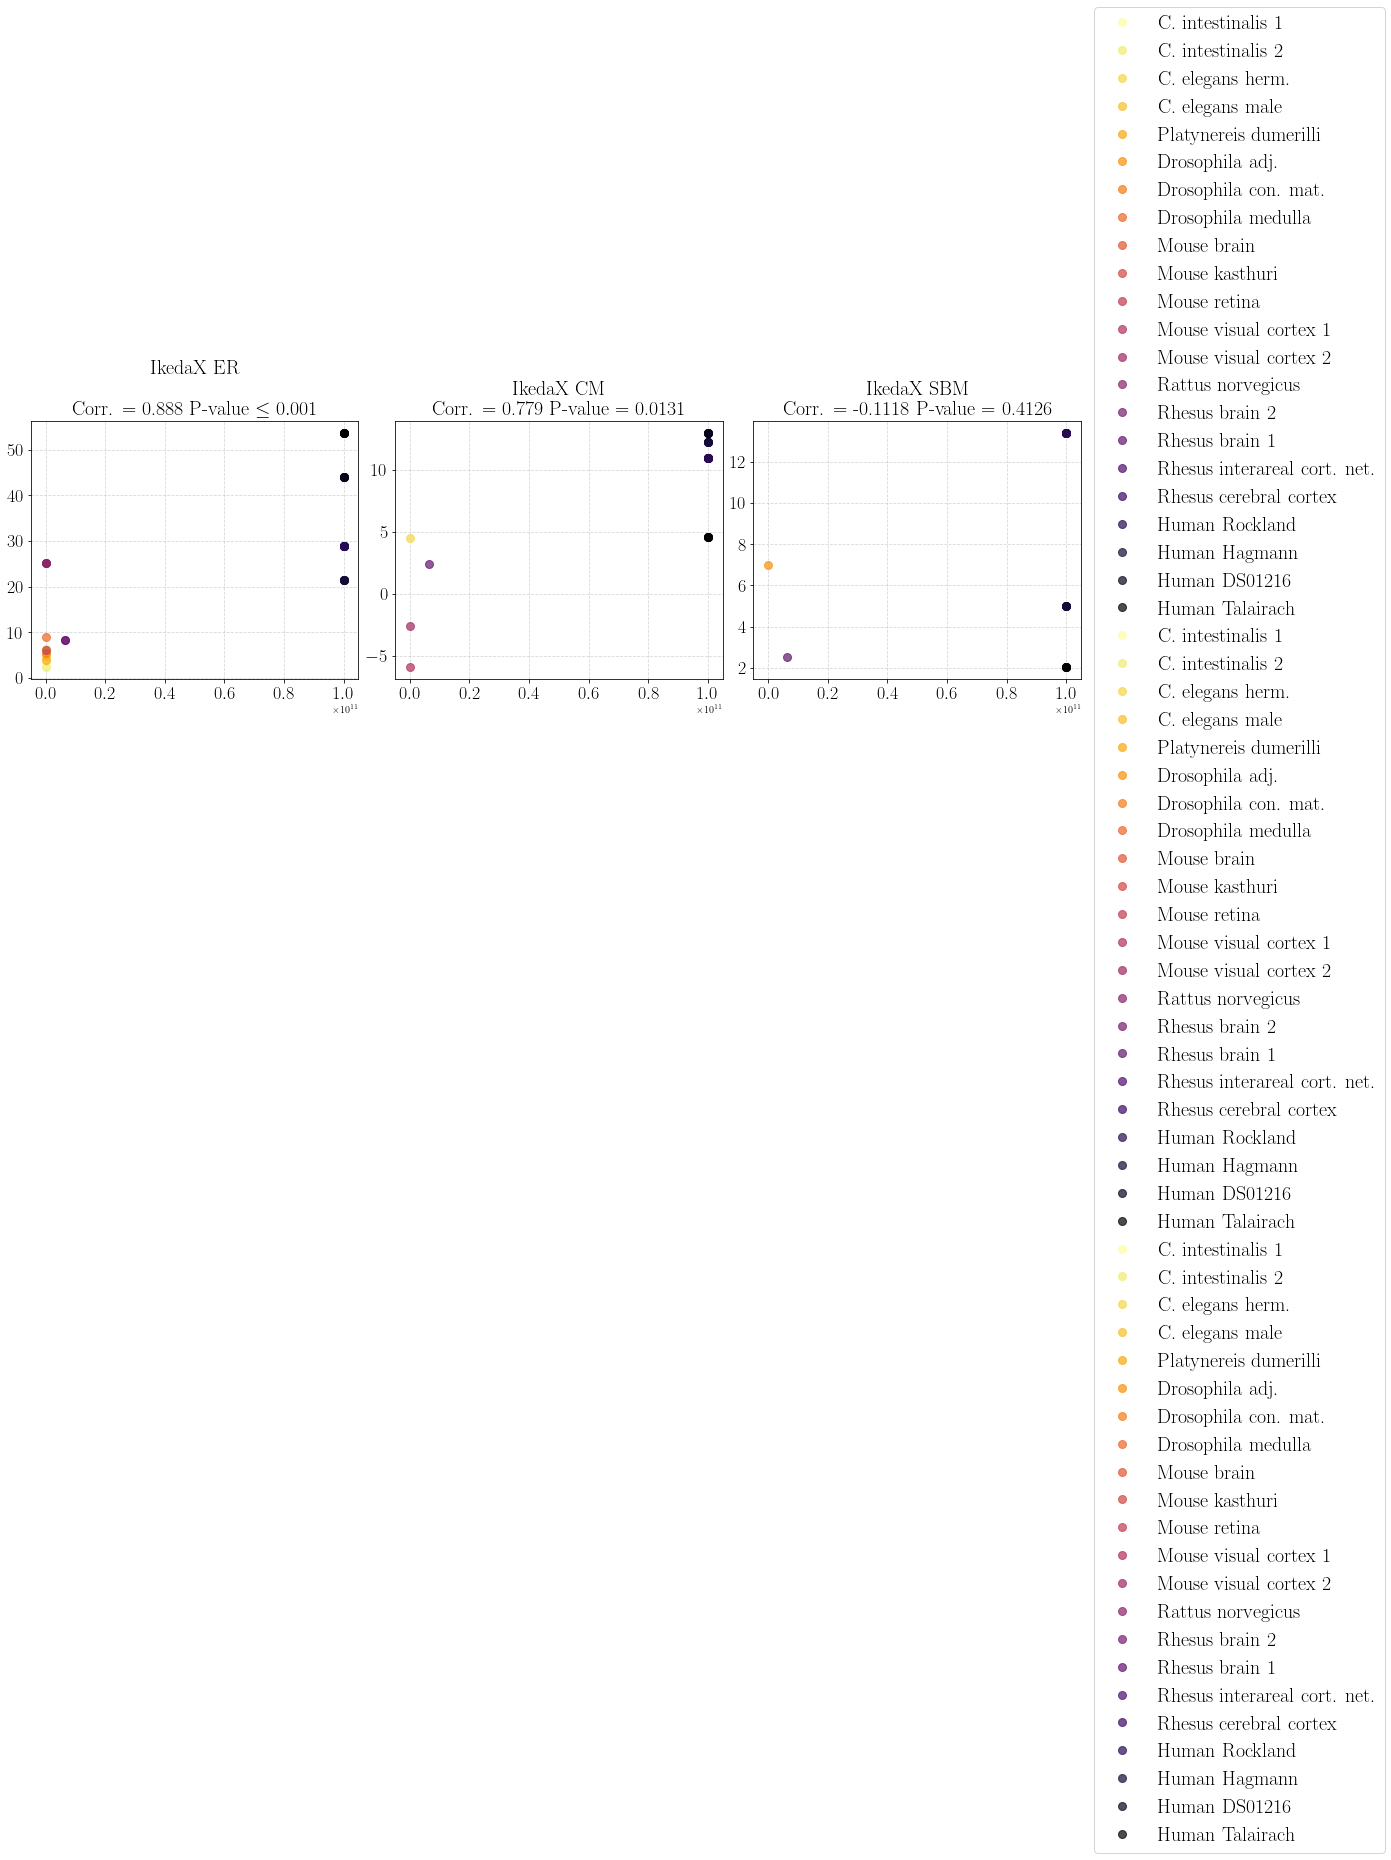

In [93]:
key = 'N tot spec' #'N tot spec' 'N'

signals=signals_sub1
signal_names = signal_names_sub1

null_models=['ZER', 'ZCM', 'ZSBM']
null_models_names = ['ER', 'CM', 'SBM']


for n in range(len(signals)): # whire, mackey glass...
    signal = signals[n]
    print(signals[n])

    rows=1
    cols=3
    fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(15,5), constrained_layout=True)


    #------------

    df = mean_Rank_realizations('../results_Emp_processed_Rank/' + signal + '.txt', 
                                        connectomes_info, network_names, network_names_pro, label)
    df_ER = mean_Rank_realizations('../results_ER_processed_Rank/' + signal + '.txt', 
                                        connectomes_info, network_names, network_names_pro, label)
    df_CM = mean_Rank_realizations('../results_CM_processed_Rank/' + signal + '.txt', 
                                        connectomes_info, network_names, network_names_pro, label)
    df_SBM = mean_Rank_realizations('../results_SBM_processed_Rank/' + signal + '.txt', 
                                        connectomes_info, network_names, network_names_pro, label)

    df = df.rename(columns = {'Rank1.mean': 'Rank.mean', 'Rank1.std': 'Rank.std'})    

    df['Rank.mean_ER'] = df_ER['Rank1.mean']
    df['Rank.std_ER']  = df_ER['Rank1.std']

    df['Rank.mean_CM'] = df_CM['Rank1.mean']
    df['Rank.std_CM']  = df_CM['Rank1.std']

    df['Rank.mean_SBM'] = df_SBM['Rank1.mean']
    df['Rank.std_SBM']  = df_SBM['Rank1.std']

    df['ZER'] = ( df['Rank.mean_ER'] - df['Rank.mean'] ) / np.sqrt( np.power(df['Rank.std']/np.sqrt(df['Count']),2) 
                                    + np.power(df['Rank.std_ER']/np.sqrt(df['Count']),2) )
    df['ZCM'] = ( df['Rank.mean_CM'] - df['Rank.mean'] ) / np.sqrt( np.power(df['Rank.std']/np.sqrt(df['Count']),2) 
                                    + np.power(df['Rank.std_CM']/np.sqrt(df['Count']),2) )
    df['ZSBM'] = ( df['Rank.mean_SBM'] - df['Rank.mean'] ) / np.sqrt( np.power(df['Rank.std']/np.sqrt(df['Count']),2) 
                                    + np.power(df['Rank.std_SBM']/np.sqrt(df['Count']),2) )

    df_snr = df[df['SNR'] == 100].sort_values(by=['N tot spec'])

    df_snr = df_snr[['Network', 'ZER', 'ZCM', 'ZSBM']]

    #df_snr.replace([np.inf, -np.inf], np.nan, inplace=True) #--

    only_significant=True
    version='2'
    if only_significant:
        df_snr['ZER'] = np.where(df_snr['ZER'].between(-1.96,1.96), np.nan, df_snr['ZER'])
        df_snr['ZCM'] = np.where(df_snr['ZCM'].between(-1.96,1.96), np.nan, df_snr['ZCM'])
        df_snr['ZSBM'] = np.where(df_snr['ZSBM'].between(-1.96,1.96), np.nan, df_snr['ZSBM'])
        version='only_significant'



    df_snr = df_snr.set_index('Network', drop=False)
    df_snr.index.names = [None]


    network = list(df_snr['Network'])
    col = palette.inferno(len(network))[::-1]
    
    df_snr_winfo = df_snr.merge(connectomes_info, how='left', left_on='Network', right_on='label_mean')
    
    
    
    for nm in range(len(null_models)):
        null_mod = null_models[nm]
        null_mod_name = null_models_names[nm]
        
        corr_data_x = []
        corr_data_y = []

        for s in range(len(network)):
            df_sig = df_snr_winfo[df_snr_winfo['Network'] == network[s]]
            ax[nm].plot(df_sig[key], df_sig[null_mod], 
                            'o', color = col[s], alpha = 0.7, markersize=8,
                            label = network[s] ) #if n==0 else None

            if df_sig[key].shape[0]==1:
                corr_data_x.append(float(df_sig[key]))
                corr_data_y.append(float(df_sig[null_mod]))
            else:
                corr_data_x.append(float(round(np.mean(df_sig[key]))))
                corr_data_y.append(float(np.unique(df_sig[null_mod])))           

        #----
        max_x = np.max(corr_data_x)
        max_y = np.max(corr_data_y)
        min_x = np.min(corr_data_x)
        min_y = np.min(corr_data_y)
        max_max = np.max([max_x , max_y])
        min_min = np.min([min_x , min_y])

        #ax[nm].axline((min_min, min_min),  (max_max,max_max ), color="black", linestyle=":")

        a = sp.stats.spearmanr(corr_data_x, corr_data_y, nan_policy='omit')
        alpha = 1.0 / (1.0 + 1.0 / ( -1.0 * np.e * a[1] * np.log(a[1])))
        per = permutation_test(corr_data_x, corr_data_y, 10000)




        if per > 0.001:
            ax[nm].set_title(signal + ' ' + null_mod_name + '\n' +
                                                'Corr. = '  + str(round(a[0], 4)) + '   ' + 'P-value = ' + str(round(per, 4)),fontsize=20) 
        else:
            ax[nm].set_title(signal + ' ' + null_mod_name + '\n' + '\n' +
                                                'Corr. = '  + str(round(a[0], 4)) + '   ' + r'P-value $\leq 0.001$',fontsize=20) 



        print(null_mod, str(round(a[0], 4)), str(round(per, 4)))

        #ax[n].set_xscale('log')
        #ax[n].set_yscale('log')
        ax[nm].tick_params(axis='both', labelsize=18)
        ax[nm].grid(True, which="both", ls="--", alpha=0.5)

        #ax[n].set_aspect("equal")
        
    # save plot       
    fig.legend(bbox_to_anchor=(1,2), loc='upper left',fontsize=20)

    do_save = True
    if do_save:
        filename = './plots/' + signal_names[n] + '_corr_ZscoreRank_' + key +  '_v_' + version +'.pdf'
        plt.savefig(filename) #, bbox_inches='tight'

      